In [103]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import respy as rp
import numpy as np

params, options, df = rp.get_example_model("robinson", with_data=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/peisenha/external_storage/ownCloud/office/OpenSourceEconomics/respy/respy/pre_processing/model_processing.py:491: UserWarning: The model contains superfluous information on lagged choices. The covariates and filters require 0 lagged choices whereas 1 lags are specified in params. Ignore superfluous lags in params.
  category=UserWarning,
/home/peisenha/external_storage/ownCloud/office/OpenSourceEconomics/respy/respy/pre_processing/model_processing.py:491: UserWarning: The model contains superfluous information on lagged choices. The covariates and filters require 0 lagged choices whereas 1 lags are specified in params. Ignore superfluous lags in params.
  category=UserWarning,


In [104]:
params.head(50)

value
category                name                       
delta                   delta                 0.950
wage_fishing            exp_fishing           0.189
nonpec_fishing          constant             -1.000
nonpec_hammock          constant              2.500
shocks_sdcorr           sd_fishing            0.010
                        sd_hammock            0.010
                        corr_hammock_fishing  0.000
lagged_choice_1_hammock constant              1.000

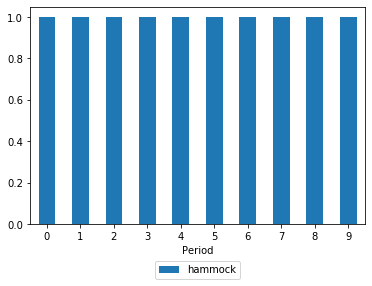

In [105]:
fig, ax = plt.subplots()

df.groupby("Period").Choice.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, ax=ax
)


plt.xticks(rotation="horizontal")

plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.275), ncol=2)

plt.show()
plt.close()


In [106]:
crit_func = rp.get_crit_func(params, options, df)
crit_func(params)

-6.684603383114142

In [107]:
for delta in np.linspace(0.8, 1, 10):
    params.loc[("delta", "delta"), :] = delta
    fval = crit_func(params)
    print(delta, fval)

0.8 -6.684603383114142
0.8222222222222223 -6.684603383114142
0.8444444444444444 -6.684603383114142
0.8666666666666667 -6.684603383114142
0.888888888888889 -6.684603383114142
0.9111111111111111 -6.684603383114142
0.9333333333333333 -6.684603383114142
0.9555555555555555 -6.684603383114142
0.9777777777777777 -6.684603383114142
1.0 -6.684603383114142
